# CSE 445 - Project : Prediciting Water Potability
    Done By: Fairuz nawar, Bishal Bhowmik, Joy chandra saha   

# Importing required Libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

# Reading the Dataset

In [3]:
wp = pd.read_csv('water_potability.csv')
print(wp.shape)
wp.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Preprocessing


In [4]:
# Investigate all the elements whithin each Feature
for column in wp:
    unique_vals = wp[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature ph :2786
The number of values for feature Hardness :3276
The number of values for feature Solids :3276
The number of values for feature Chloramines :3276
The number of values for feature Sulfate :2496
The number of values for feature Conductivity :3276
The number of values for feature Organic_carbon :3276
The number of values for feature Trihalomethanes :3115
The number of values for feature Turbidity :3276
The number of values for feature Potability :2 -- [0 1]


In [5]:
#checking for nullvalues 
print(wp.isnull().sum())
wp['Potability'].value_counts()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


0    1998
1    1278
Name: Potability, dtype: int64

In [6]:
# Replacing null/missing values with mean values
wp['ph']=wp['ph'].fillna(wp.groupby(['Potability'])['ph'].transform('mean'))
wp['Sulfate']=wp['Sulfate'].fillna(wp.groupby(['Potability'])['Sulfate'].transform('mean'))
wp['Trihalomethanes']=wp['Trihalomethanes'].fillna(wp.groupby(['Potability'])['Trihalomethanes'].transform('mean'))
print(wp.isnull().sum())
wp.head()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Visualizing the Dataset

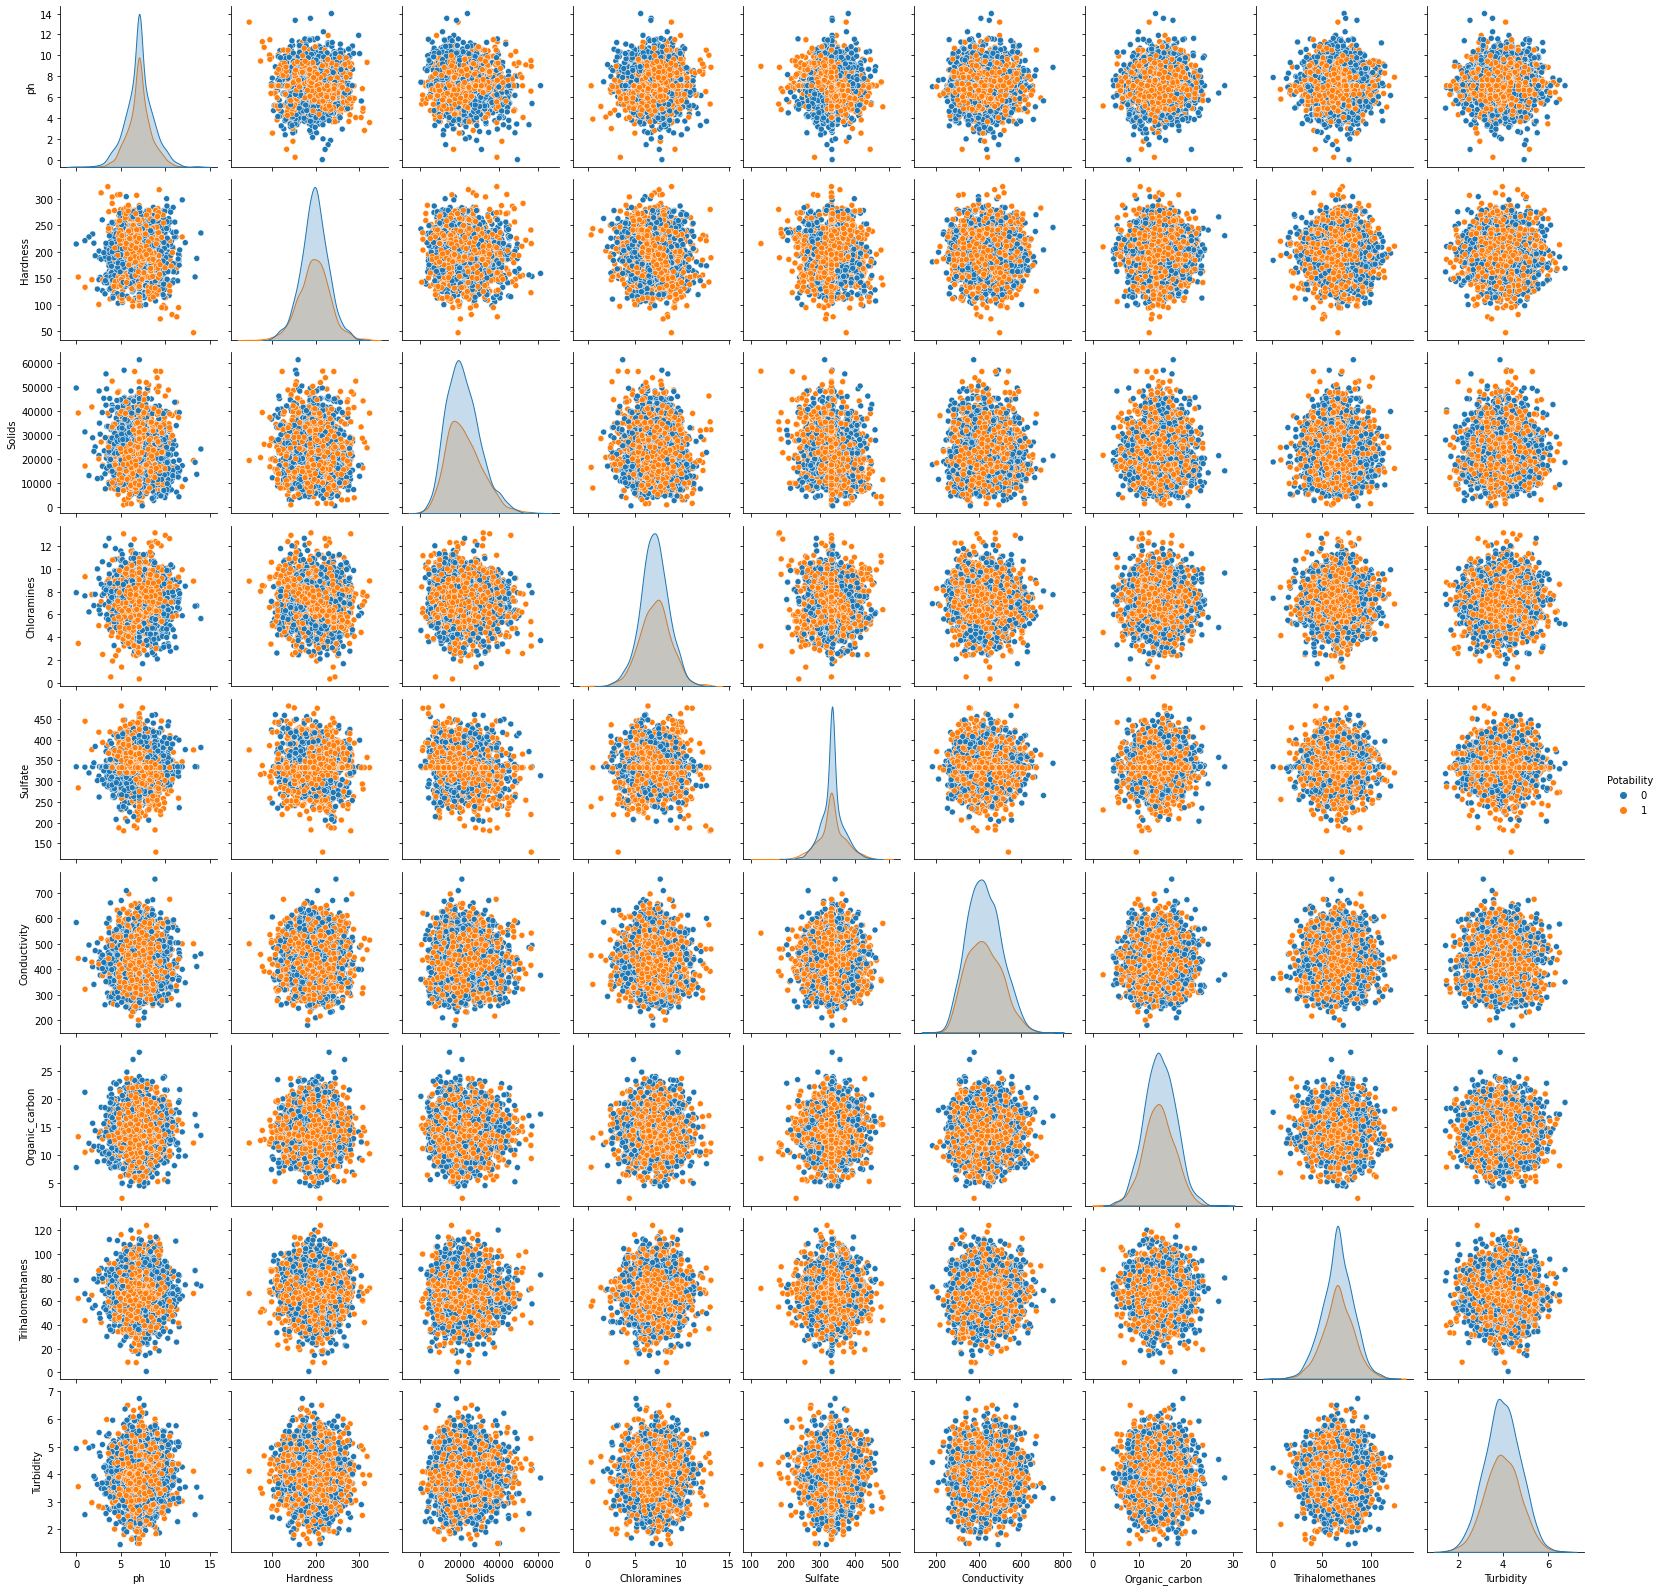

In [26]:
t = sns.pairplot(wp, hue = 'Potability')

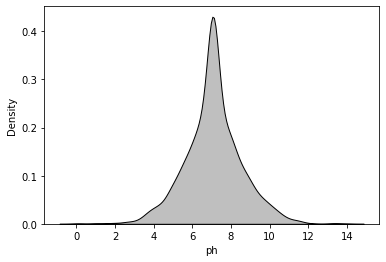

In [7]:
sns.kdeplot(x = 'ph', data = wp,shade = True, color = 'black');

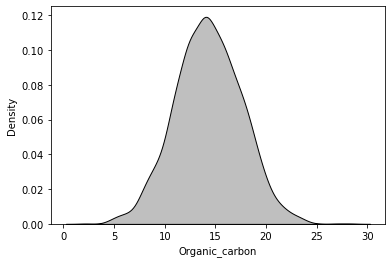

In [7]:
sns.kdeplot(x = 'Organic_carbon', data = wp,shade = True, color = 'black');

<AxesSubplot:>

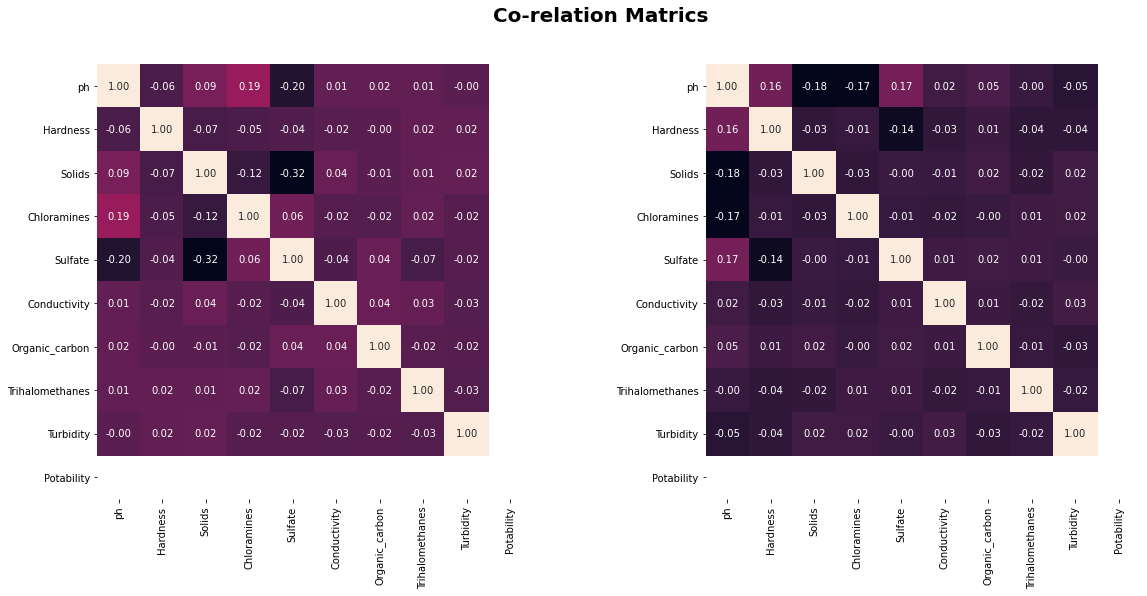

In [8]:
#Corelation matrics to check if the features have any corelation between them
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(wp[wp['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(wp[wp['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

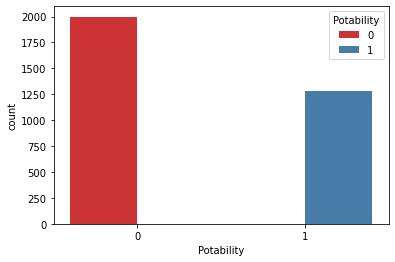

In [9]:
cat_features = ['Potability',]
for f in cat_features:
    plt.figure()
    sns.countplot(x = f, data = wp, hue = 'Potability', palette = 'Set1')

# Splitting the dataset into training and testing set

In [12]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
X=wp.drop(['Potability'], axis=1)
y=wp['Potability']
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

# Feature Scaling using StandardScaler 

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
samp = SMOTE()
scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# Limiting values of the dataset using values from google search


In [13]:
cols=wp.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

# Using Cross Validation and applying Classifier Algorithms

In [14]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
crossvalidation_score=[]
mod = []
model =[AdaBoostClassifier(),BaggingClassifier(), SVC(),RandomForestClassifier(), GradientBoostingClassifier(),
        DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier(),LogisticRegression(),GaussianNB(),]
for mdl in model:
    crossvalidation_score.append(cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(mdl)
model_df= pd.DataFrame(columns=['model','crossvalidation_score'])
model_df['model']= mod
model_df['crossvalidation_score']= crossvalidation_score
model_df.sort_values(by=['crossvalidation_score'], ascending=True)


,model,crossvalidation_score
8,LogisticRegression(),0.496304
2,SVC(),0.511756
9,GaussianNB(),0.538635
7,KNeighborsClassifier(),0.609891
6,ExtraTreeClassifier(),0.611224
0,AdaBoostClassifier(),0.670692
5,DecisionTreeClassifier(),0.723780
1,BaggingClassifier(),0.737892
4,GradientBoostingClassifier(),0.754027
3,RandomForestClassifier(),0.778551


# Parameter Tuning

In [28]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(RandomForestClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")


Best Estimator: {'n_estimators': 80} , Best Score : 0.8084732953584117
Best Estimator: {'n_estimators': 500} , Best Score : 0.7795702442050645


# Model Selection

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       510
           1       0.69      0.72      0.71       309

    accuracy                           0.78       819
   macro avg       0.76      0.77      0.76       819
weighted avg       0.78      0.78      0.78       819

<bound method ClassifierMixin.score of RandomForestClassifier(n_estimators=80)>


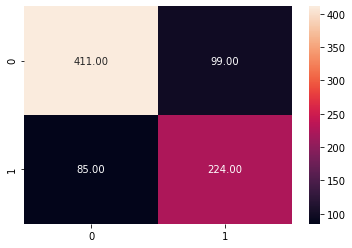

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(model.score)
